In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [52]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

## Loading the dataset

In [53]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv", sep = ',')

In [54]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [55]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Data Vizualisation

### Comparing average weights (M vs W)

In [56]:
data_gen_wei = data.groupby("Gender").Weight.mean().sort_values()
data_gen_wei

Gender
Female    82.302364
Male      90.769478
Name: Weight, dtype: float64

Text(0.5, 1.0, 'average weight per gender')

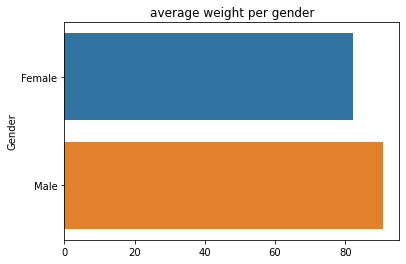

In [57]:
import seaborn as sns
sns.barplot(y = data_gen_wei.index, x = data_gen_wei.values).set_title("average weight per gender")

### Average age per gender

In [58]:
data_gen_age = data.groupby("Gender").Age.mean().sort_values()
data_gen_age

Gender
Female    24.001907
Male      24.616020
Name: Age, dtype: float64

Text(0.5, 1.0, 'Average Age per Gender')

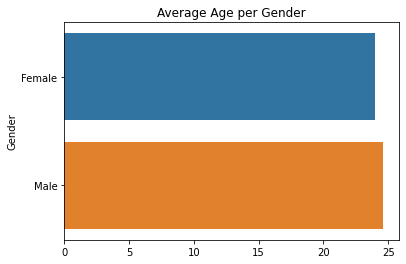

In [59]:
sns.barplot(y = data_gen_age.index, x = data_gen_age.values).set_title("Average Age per Gender")

### Average weight per age

In [60]:
data_2 = data
data_2.Age = data_2.Age.astype(int)
data_2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [61]:
data_age_wei = data_2.groupby("Age").Weight.mean().sort_values()
data_age_wei

Age
51     50.000000
16     58.168463
17     64.430676
61     66.000000
19     71.231318
14     72.000000
18     78.174598
44     80.000000
43     80.308643
45     80.770579
42     81.057937
55     81.176972
35     81.888098
50     82.130728
22     82.430610
47     83.353970
38     83.361464
23     84.108503
34     84.159209
33     85.174239
15     86.000000
21     86.386153
39     86.423764
52     87.000000
36     87.073921
37     87.909238
20     88.262237
46     88.600878
40     88.915505
32     89.893641
56     90.000000
27     92.905887
24     95.365826
41     95.661906
29     96.030020
28     96.692607
31    101.268891
25    102.776836
26    104.308370
30    107.282864
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Average Weight per Age')

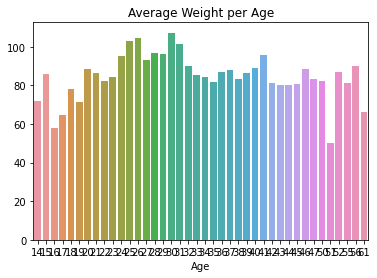

In [62]:
sns.barplot(y = data_age_wei.values, x = data_age_wei.index).set_title("Average Weight per Age")

### Data conversion

In [63]:
data.Gender = data.Gender.map({'Male' : 1, 'Female' : 2})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,2,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2,21,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2,22,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [64]:
data.family_history_with_overweight.value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [65]:
data.family_history_with_overweight = data.family_history_with_overweight.map({'yes' : 1, 'no' : 0})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,2,21,1.520000,56.000000,1,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.800000,77.000000,1,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.800000,87.000000,0,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22,1.780000,89.800000,0,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [66]:
data.FAVC.value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

In [67]:
data.FAVC = data.FAVC.map({'yes' : 1, 'no' : 0})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,0,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,2,21,1.520000,56.000000,1,0,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.800000,77.000000,1,0,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.800000,87.000000,0,0,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22,1.780000,89.800000,0,0,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,1,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,1,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,1,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [68]:
data.CAEC.value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [69]:
data.CAEC = data.CAEC.map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,0,2.0,3.0,1,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,2,21,1.520000,56.000000,1,0,3.0,3.0,1,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.800000,77.000000,1,0,2.0,3.0,1,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.800000,87.000000,0,0,3.0,3.0,1,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22,1.780000,89.800000,0,0,2.0,1.0,1,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,1,3.0,3.0,1,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,1,3.0,3.0,1,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,1,3.0,3.0,1,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,1,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [70]:
data.SMOKE.value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

In [71]:
data.SMOKE = data.SMOKE.map({'yes' : 1, 'no' : 0})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,2,21,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [72]:
data.CALC.value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [73]:
data.CALC = data.CALC.map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,no,0.000000,1.000000,0,Public_Transportation,Normal_Weight
1,2,21,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,yes,3.000000,0.000000,1,Public_Transportation,Normal_Weight
2,1,23,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,no,2.000000,1.000000,2,Public_Transportation,Normal_Weight
3,1,27,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,no,2.000000,0.000000,2,Walking,Overweight_Level_I
4,1,22,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,no,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,no,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,no,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,no,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,no,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III


In [74]:
data.SCC.value_counts()

no     2015
yes      96
Name: SCC, dtype: int64

In [75]:
data.SCC = data.SCC.map({'yes' : 1, 'no' : 0})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,Public_Transportation,Normal_Weight
1,2,21,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Public_Transportation,Normal_Weight
2,1,23,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,Public_Transportation,Normal_Weight
3,1,27,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,Walking,Overweight_Level_I
4,1,22,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III


In [77]:
data.MTRANS.value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [78]:
data.MTRANS = data.MTRANS.map({'Public_Transportation' : 0, 'Automobile' : 1, 'Walking' : 2, 'Motorbike' : 3, 'Bike' : 4})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,Normal_Weight
1,2,21,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,Normal_Weight
2,1,23,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,Normal_Weight
3,1,27,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,2,Overweight_Level_I
4,1,22,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,Obesity_Type_III
2107,2,21,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,Obesity_Type_III
2108,2,22,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,Obesity_Type_III
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,Obesity_Type_III


### Other plots

In [83]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Text(0, 0.5, 'Obesity Rate')

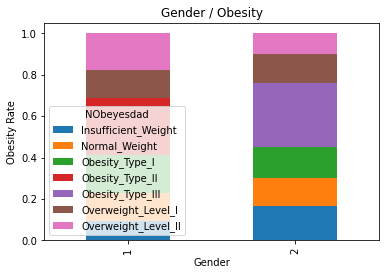

In [81]:
# Gender impact on Obesity
table = pd.crosstab(data.Gender,data.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("Gender / Obesity")
plt.xlabel("Gender")
plt.ylabel("Obesity Rate")

Text(0, 0.5, 'Obesity Rate')

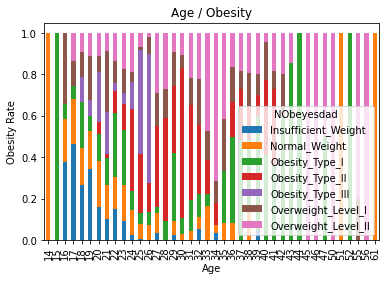

In [87]:
# Age impact on Obesity
table = pd.crosstab(data.Age,data.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("Age / Obesity")
plt.xlabel("Age")
plt.ylabel("Obesity Rate")

Text(0, 0.5, 'Obesity Rate')

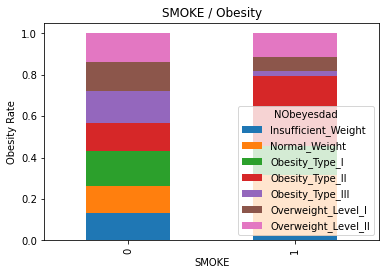

In [88]:
# SMOKE impact on Obesity
table = pd.crosstab(data.SMOKE,data.NObeyesdad)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title("SMOKE / Obesity")
plt.xlabel("SMOKE")
plt.ylabel("Obesity Rate")

In [89]:
data.to_csv("Obesity dataset converted.csv", sep = ';')

In [91]:
len(data.columns)

17